In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, MultiTaskLasso
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDRegressor # when attributes are big
from sklearn.kernel_ridge import KernelRidge # identical to support vector regression (SVR)
from sklearn.svm import SVR # use support vector regression (SVR)
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc

from sklearn.dummy import DummyRegressor

# Load prepared data

In [6]:
save_path = "/Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/data/raw/"

## fmap mean all experiments

In [5]:
file_name = save_path+"fmap_mean.txt"
columns =['exp', 'mini_exp', 'i', 'j', 'k', 'mean0', 'mean1', 'mean2', 'mean3', 'mean4', 'theory']
data = np.loadtxt(file_name);

In [6]:
df = pd.DataFrame(data, columns=columns)
df = df.astype({"exp": int, "i": int, "j": int, "k": int, "mini_exp": int})

In [7]:
df

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory
0,36,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,36,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,36,1,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0
3,36,1,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0
4,36,1,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3244027,38,6,43,63,59,0.0,0.0,0.0,0.0,0.0,0.0
3244028,38,6,43,63,60,0.0,0.0,0.0,0.0,0.0,0.0
3244029,38,6,43,63,61,0.0,0.0,0.0,0.0,0.0,0.0
3244030,38,6,43,63,62,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3244032 entries, 0 to 3244031
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   exp       int64  
 1   mini_exp  int64  
 2   i         int64  
 3   j         int64  
 4   k         int64  
 5   mean0     float64
 6   mean1     float64
 7   mean2     float64
 8   mean3     float64
 9   mean4     float64
 10  theory    float64
dtypes: float64(6), int64(5)
memory usage: 272.3 MB


## 55 fmap means

In [9]:
arr = [4, 6, 8, 10, 12]
col = []
for i in range(len(arr)):
    for j in range(1, 12):
        name = str(arr[i])+'_'+str(j+1)+'m'+str(j)
        col.append(name)

In [11]:
file_name = save_path+"fmap_mean_55.txt"
columns = ['exp', 'mini_exp', 'i', 'j', 'k']
for i in range(len(col)): 
    columns.append(col[i])
columns.append('theory')
data = np.loadtxt(file_name);

In [12]:
df_55 = pd.DataFrame(data, columns=columns)
df_55 = df_55.astype({"exp": int, "i": int, "j": int, "k": int, "mini_exp": int})

In [13]:
df_55

,exp,mini_exp,i,j,k,4_2m1,4_3m2,4_4m3,4_5m4,4_6m5,...,12_4m3,12_5m4,12_6m5,12_7m6,12_8m7,12_9m8,12_10m9,12_11m10,12_12m11,theory
0,36,1,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36,1,0,0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36,1,0,0,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36,1,0,0,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,36,1,0,0,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3244027,38,6,43,63,59,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3244028,38,6,43,63,60,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3244029,38,6,43,63,61,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3244030,38,6,43,63,62,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df_55.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3244032 entries, 0 to 3244031
Data columns (total 61 columns):
 #   Column    Dtype  
---  ------    -----  
 0   exp       int64  
 1   mini_exp  int64  
 2   i         int64  
 3   j         int64  
 4   k         int64  
 5   4_2m1     float64
 6   4_3m2     float64
 7   4_4m3     float64
 8   4_5m4     float64
 9   4_6m5     float64
 10  4_7m6     float64
 11  4_8m7     float64
 12  4_9m8     float64
 13  4_10m9    float64
 14  4_11m10   float64
 15  4_12m11   float64
 16  6_2m1     float64
 17  6_3m2     float64
 18  6_4m3     float64
 19  6_5m4     float64
 20  6_6m5     float64
 21  6_7m6     float64
 22  6_8m7     float64
 23  6_9m8     float64
 24  6_10m9    float64
 25  6_11m10   float64
 26  6_12m11   float64
 27  8_2m1     float64
 28  8_3m2     float64
 29  8_4m3     float64
 30  8_5m4     float64
 31  8_6m5     float64
 32  8_7m6     float64
 33  8_8m7     float64
 34  8_9m8     float64
 35  8_10m9    float64
 36  8_11m10 

## Only +ON and -ON 

In [4]:
file_name = save_path+"fmap_on.txt"
columns =['exp', 'mini_exp', 'run', 'i', 'j', 'k', 'off', 'on', 'theory']
data = np.loadtxt(file_name);

NameError: name 'save_path' is not defined

In [30]:
df_on = pd.DataFrame(data, columns=columns)
df_on = df_on.astype({"exp": int, "i": int, "j": int, "k": int, "mini_exp": int, "run":int})

In [2]:
df_on[(df_on['i']==31)&(df_on['j']==31)&(df_on['k']==31)]

NameError: name 'df_on' is not defined

In [3]:
df_on

NameError: name 'df_on' is not defined

In [32]:
df_on.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6488064 entries, 0 to 6488063
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   exp       int64  
 1   mini_exp  int64  
 2   run       int64  
 3   i         int64  
 4   j         int64  
 5   k         int64  
 6   off       float64
 7   on        float64
 8   theory    float64
dtypes: float64(3), int64(6)
memory usage: 445.5 MB


## New attributes for Linear Models

In [7]:
file_name = save_path+"fmap_mean_new.txt"
columns =['exp', 'mini_exp', 'i', 'j', 'k', 'mean0', 'mean1', 'mean2', 'mean3', 'mean4', 'theory', 'new0', 'new1', 'new2', 'new3', 'new4', 'slope', 'intercept']
data = np.loadtxt(file_name);

In [8]:
df_new = pd.DataFrame(data, columns=columns)
df_new = df_new.astype({"exp": int, "i": int, "j": int, "k": int, "mini_exp": int})

In [9]:
df_new.isnull().any()

exp          False
mini_exp     False
i            False
j            False
k            False
mean0        False
mean1        False
mean2        False
mean3        False
mean4        False
theory       False
new0         False
new1         False
new2         False
new3         False
new4         False
slope        False
intercept    False
dtype: bool

In [10]:
df_new.describe()

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory,new0,new1,new2,new3,new4,slope,intercept
count,3.244032e+06,3.244032e+06,3.244032e+06,3.244032e+06,3.244032e+06,3.244032e+06,3.244032e+06,3.244032e+06,3.244032e+06,3.244032e+06,3.244032e+06,3.244032e+06,3.244032e+06,3.244032e+06,3.244032e+06,3.244032e+06,3.244032e+06,3.244032e+06
mean,3.700000e+01,3.500000e+00,2.150000e+01,3.150000e+01,3.150000e+01,-4.675177e+01,-4.632270e+01,-4.943398e+01,-5.254767e+01,-5.105728e+01,2.070648e+00,inf,-inf,-inf,-inf,inf,-1.076377e+00,-4.692826e+01
std,8.164967e-01,1.707825e+00,1.269843e+01,1.847296e+01,1.847296e+01,3.848085e+02,3.926424e+02,3.857237e+02,3.872141e+02,3.879891e+02,8.492458e+00,NaN,NaN,NaN,NaN,NaN,1.874691e+01,3.820577e+02
min,3.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.422362e+04,-1.461919e+04,-1.252448e+04,-1.425134e+04,-1.239863e+04,-7.759955e+02,-6.289785e+08,-inf,-inf,-inf,-6.289785e+08,-1.758125e+03,-1.271916e+04
25%,3.600000e+01,2.000000e+00,1.075000e+01,1.575000e+01,1.575000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.700000e+01,3.500000e+00,2.150000e+01,3.150000e+01,3.150000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.800000e+01,5.000000e+00,3.225000e+01,4.725000e+01,4.725000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.800000e+01,6.000000e+00,4.300000e+01,6.300000e+01,6.300000e+01,6.884447e+03,7.646300e+03,7.653812e+03,6.849814e+03,7.587812e+03,7.697382e+02,inf,9.660116e+07,1.257957e+09,1.257957e+09,inf,1.810604e+03,7.199591e+03


In [11]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3244032 entries, 0 to 3244031
Data columns (total 18 columns):
 #   Column     Dtype  
---  ------     -----  
 0   exp        int64  
 1   mini_exp   int64  
 2   i          int64  
 3   j          int64  
 4   k          int64  
 5   mean0      float64
 6   mean1      float64
 7   mean2      float64
 8   mean3      float64
 9   mean4      float64
 10  theory     float64
 11  new0       float64
 12  new1       float64
 13  new2       float64
 14  new3       float64
 15  new4       float64
 16  slope      float64
 17  intercept  float64
dtypes: float64(13), int64(5)
memory usage: 445.5 MB


# Split data

## Data 1: fmap mean all experiments

In [18]:
df.iloc[:, 2:-1]

,i,j,k,mean0,mean1,mean2,mean3,mean4
0,0,0,0,0.0,0.0,0.0,0.0,0.0
1,0,0,1,0.0,0.0,0.0,0.0,0.0
2,0,0,2,0.0,0.0,0.0,0.0,0.0
3,0,0,3,0.0,0.0,0.0,0.0,0.0
4,0,0,4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
3244027,43,63,59,0.0,0.0,0.0,0.0,0.0
3244028,43,63,60,0.0,0.0,0.0,0.0,0.0
3244029,43,63,61,0.0,0.0,0.0,0.0,0.0
3244030,43,63,62,0.0,0.0,0.0,0.0,0.0


In [110]:
X = df.iloc[:, 2:-1].values  # include i,j,k
y = df['theory'].values

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [111]:
print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3244032, 8)
(3244032,)
(2270822, 58)
(2270822,)
(973210, 58)
(973210,)


## Data2: One mini experiment

In [105]:
df_train = df[(df['exp']==38) & (df['mini_exp']!=6)]
df_test = df[(df['exp']==38) & (df['mini_exp']==6)]

In [106]:
df_train.iloc[:, 2:-1]

,i,j,k,mean0,mean1,mean2,mean3,mean4
2162688,0,0,0,0.0,0.0,0.0,0.0,0.0
2162689,0,0,1,0.0,0.0,0.0,0.0,0.0
2162690,0,0,2,0.0,0.0,0.0,0.0,0.0
2162691,0,0,3,0.0,0.0,0.0,0.0,0.0
2162692,0,0,4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
3063803,43,63,59,0.0,0.0,0.0,0.0,0.0
3063804,43,63,60,0.0,0.0,0.0,0.0,0.0
3063805,43,63,61,0.0,0.0,0.0,0.0,0.0
3063806,43,63,62,0.0,0.0,0.0,0.0,0.0


In [107]:
X2_train = df_train.iloc[:, 2:-1].values
y2_train = df_train['theory'].values

X2_test = df_test.iloc[:, 2:-1].values
y2_test = df_test['theory'].values

In [108]:
print(X2_train.shape)
print(y2_train.shape)
print(X2_test.shape)
print(y2_test.shape)

(901120, 8)
(901120,)
(180224, 8)
(180224,)


## Data3: 55 means

In [135]:
df_55.iloc[:, 2:-1]

,i,j,k,4_2m1,4_3m2,4_4m3,4_5m4,4_6m5,4_7m6,4_8m7,...,12_3m2,12_4m3,12_5m4,12_6m5,12_7m6,12_8m7,12_9m8,12_10m9,12_11m10,12_12m11
0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3244027,43,63,59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3244028,43,63,60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3244029,43,63,61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3244030,43,63,62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
X = df_55.iloc[:, 2:-1].values  # include i,j,k
y = df_55['theory'].values

X3_train, X3_test, y3_train, y3_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [137]:
print(X.shape)
print(y.shape)
print(X3_train.shape)
print(y3_train.shape)
print(X3_test.shape)
print(y3_test.shape)

(3244032, 58)
(3244032,)
(2270822, 58)
(2270822,)
(973210, 58)
(973210,)


## Data4: +ON and -ON

In [139]:
df_on.iloc[:, 2:-1]

,run,i,j,k,off,on
0,1,0,0,0,0.0,0.0
1,1,0,0,1,0.0,0.0
2,1,0,0,2,0.0,0.0
3,1,0,0,3,0.0,0.0
4,1,0,0,4,0.0,0.0
...,...,...,...,...,...,...
6488059,-1,43,63,59,0.0,0.0
6488060,-1,43,63,60,0.0,0.0
6488061,-1,43,63,61,0.0,0.0
6488062,-1,43,63,62,0.0,0.0


In [140]:
X = df_on.iloc[:, 2:-1].values  # include i,j,k
y = df_on['theory'].values

X4_train, X4_test, y4_train, y4_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [141]:
print(X.shape)
print(y.shape)
print(X4_train.shape)
print(y4_train.shape)
print(X4_test.shape)
print(y4_test.shape)

(6488064, 6)
(6488064,)
(4541644, 6)
(4541644,)
(1946420, 6)
(1946420,)


## Data5: fmap mean without zero 
Not so effective

In [ ]:
df_copy = df.copy()
idx = df[(df['mean0']==0.0) & (df['mean1']==0.0) & (df['mean2']==0.0) & (df['mean3']==0.0) & (df['mean4']==0.0)].index
df_copy.drop(idx, inplace=True)
df_copy.reset_index(drop=True, inplace=True)
df_copy.shape

In [66]:
df_nonzero = df[(df['mean0']!=0.0) & (df['mean1']!=0.0) & (df['mean2']!=0.0) & (df['mean3']!=0.0) & (df['mean4']!=0.0)]

In [67]:
df_nonzero

,exp,i,j,k,mini_exp,mean0,mean1,mean2,mean3,mean4,theory
30760,36,7,32,40,1,118.874306,102.631088,73.720810,46.604973,35.842915,4.988159
30761,36,7,32,41,1,-69.809402,-88.836975,-115.809509,-147.981812,-157.407669,4.591202
30762,36,7,32,42,1,-501.965088,-518.938477,-546.379456,-559.395264,-578.390381,4.237324
30763,36,7,32,43,1,-729.152405,-748.379883,-771.094543,-794.678772,-810.996643,3.918999
30799,36,7,33,15,1,-1217.971191,-1236.205566,-1261.405762,-1284.039307,-1296.501587,3.371496
...,...,...,...,...,...,...,...,...,...,...,...
3213651,38,36,37,19,6,-75.107628,-68.905487,-75.427681,-82.513771,-79.595093,4.270157
3213652,38,36,37,20,6,76.162445,81.230690,75.100578,66.783051,69.944969,4.636876
3213653,38,36,37,21,6,196.146164,202.442993,194.505157,186.740524,189.227448,5.051056
3213660,38,36,37,28,6,749.112549,763.357300,750.066223,730.827637,739.551208,13.024664


In [68]:
X = df_nonzero.iloc[:, 5:-1].values
y = df_nonzero['theory'].values

X5_train, X5_test, y5_train, y5_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [ ]:
print(X.shape)
print(y.shape)
print(X5_train.shape)
print(y5_train.shape)
print(X5_test.shape)
print(y5_test.shape)

## Data6: One experiment (new attributes)

In [16]:
df_train_new = df_new[(df_new['exp']==38) & (df_new['mini_exp']!=6)]
df_test_new = df_new[(df_new['exp']==38) & (df_new['mini_exp']==6)]

In [156]:
df_new.iloc[:, -7:-2]

,new0,new1,new2,new3,new4
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
3244027,0.0,0.0,0.0,0.0,0.0
3244028,0.0,0.0,0.0,0.0,0.0
3244029,0.0,0.0,0.0,0.0,0.0
3244030,0.0,0.0,0.0,0.0,0.0


In [159]:
X_train_new = df_train_new.iloc[:, -7:-2].values
y_train_new = df_train_new['theory'].values

X_test_new = df_test_new.iloc[:, -7:-2].values
y_test_new = df_test_new['theory'].values

In [160]:
print(X_train_new.shape)
print(y_train_new.shape)
print(X_test_new.shape)
print(y_test_new.shape)

(901120, 5)
(901120,)
(180224, 5)
(180224,)


# Linear Regression

## Data1: fmap mean all experiments

In [112]:
X_train = X1_train
y_train = y1_train
X_test = X1_test
y_test = y1_test

In [113]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [114]:
print('Intercept: %.3f' % lr.intercept_)

Intercept: 2.025


In [115]:
lr.coef_

array([-0.00331978,  0.01982033, -0.01342168,  0.0075893 ,  0.00628948,
        0.00131591, -0.00743258, -0.00467479])

In [116]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 67.355, test: 75.129
R^2 train: 0.035, test: 0.031


In [117]:
print('Train Accuracy: %.3f' % lr.score(X_train, y_train))
print('Test Accuracy: %.3f' % lr.score(X_test, y_test))

Train Accuracy: 0.035
Test Accuracy: 0.031


In [118]:
df[(df['i']==31) & (df['j']==31) & (df['k']==31)]

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory
128991,36,1,31,31,31,413.002289,426.249512,371.007721,317.486572,334.302094,34.932812
309215,36,2,31,31,31,324.296478,342.949097,291.172485,243.732208,263.510284,41.788628
489439,36,3,31,31,31,256.576752,278.151306,229.303864,185.196930,207.566895,41.788628
669663,36,4,31,31,31,202.316208,224.840454,178.356110,137.496048,160.452057,41.788628
849887,36,5,31,31,31,156.084747,180.730377,136.433899,96.041855,121.829865,41.788628
1030111,36,6,31,31,31,118.332359,144.919662,101.000153,61.330914,88.018120,41.788628
1210335,37,1,31,31,31,699.899963,725.856934,686.393066,651.878296,681.271912,32.912647
1390559,37,2,31,31,31,681.168640,709.709717,671.229187,645.303162,668.624512,32.912647
1570783,37,3,31,31,31,669.310791,697.510437,658.584778,627.127808,657.023743,32.912647
1751007,37,4,31,31,31,657.727051,685.579773,647.471619,615.370850,646.740906,32.912647


In [119]:
lr.predict( [[31, 31, 31, 702.532715, 736.654358, 702.625122, 668.777039, 697.872681]])

array([4.77639821])

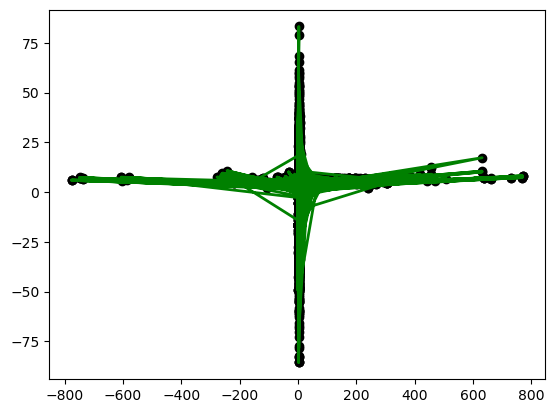

In [120]:
plt.scatter(y_test, y_test_pred,  color='black')
plt.plot(y_test, y_test_pred, color='green', linewidth=2)

## Data2: One experiment

In [121]:
X_train = X2_train
y_train = y2_train
X_test = X2_test
y_test = y2_test

In [122]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [123]:
print('Intercept: %.3f' % lr.intercept_)

Intercept: 1.987


In [124]:
lr.coef_

array([-0.00045403,  0.0183109 , -0.012191  ,  0.00346937,  0.00657331,
        0.00172369, -0.00594426,  0.00078379])

In [125]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 93.998, test: 93.906
R^2 train: 0.059, test: 0.062


In [126]:
print('Train Accuracy: %.3f' % lr.score(X_train, y_train))
print('Test Accuracy: %.3f' % lr.score(X_test, y_test))

Train Accuracy: 0.059
Test Accuracy: 0.062


In [127]:
lr.predict( [[31, 31, 31, 702.532715, 736.654358, 702.625122, 668.777039, 697.872681]])

array([7.225346])

## Data3: 55 fmean

In [142]:
X_train = X3_train
y_train = y3_train
X_test = X3_test
y_test = y3_test

In [143]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [144]:
print('Intercept: %.3f' % lr.intercept_)

Intercept: 1.816


In [145]:
lr.coef_

array([-2.98166570e-03,  1.73272461e-02, -1.23558911e-02,  1.41780749e-02,
        3.19376982e-03, -1.89003783e-03,  9.71154935e-03,  1.28347926e-03,
        2.27957061e-04, -6.50240822e-04,  6.39557024e-05,  3.64544583e-05,
        3.89115756e-04,  1.67405161e-04,  2.59615771e-02,  5.07196918e-04,
        6.24784655e-04,  4.19193612e-03,  2.50063794e-03, -1.17691009e-03,
        8.89410717e-05,  6.32174765e-04, -2.48568334e-04, -3.05993832e-04,
        2.60652286e-04, -9.37457598e-03, -3.50134773e-03, -1.71186965e-04,
        6.73588006e-04,  7.03075837e-04, -6.31133784e-04,  1.34560142e-04,
        1.37325437e-04, -3.50748585e-05, -6.33173616e-05,  4.72777806e-04,
       -2.70150008e-02, -3.93584054e-03, -1.01022391e-03, -3.19940836e-03,
       -3.18696221e-03,  1.14350290e-03,  1.78579952e-04, -4.34817823e-04,
        3.03338721e-04,  3.73762068e-04, -1.96196269e-04, -1.18138173e-03,
       -1.36960093e-03,  3.61912839e-03, -9.24610915e-03,  4.10402896e-04,
        2.41900394e-04,  

In [146]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 63.269, test: 70.744
R^2 train: 0.094, test: 0.087


In [147]:
print('Train Accuracy: %.3f' % lr.score(X_train, y_train))
print('Test Accuracy: %.3f' % lr.score(X_test, y_test))

Train Accuracy: 0.094
Test Accuracy: 0.087


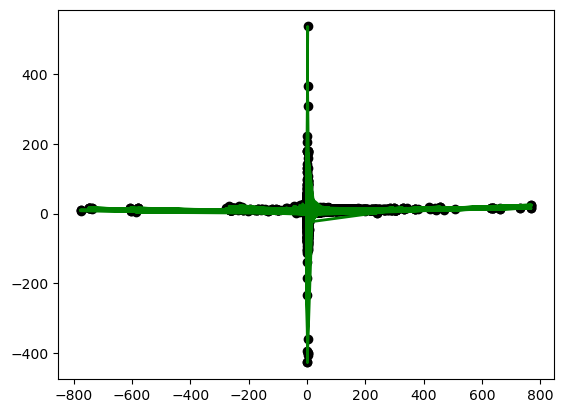

In [148]:
plt.scatter(y_test, y_test_pred,  color='black')
plt.plot(y_test, y_test_pred, color='green', linewidth=2)

## Data4: +ON and -ON

In [149]:
X_train = X4_train
y_train = y4_train
X_test = X4_test
y_test = y4_test

In [150]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [151]:
print('Intercept: %.3f' % lr.intercept_)

Intercept: 0.022


In [152]:
lr.coef_

array([ 2.05984457e+00,  1.36248847e-04,  2.11890577e-04, -4.43336151e-04,
       -4.51245806e-03,  4.62556722e-03])

In [153]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 71.418, test: 73.057
R^2 train: 0.060, test: 0.058


In [154]:
print('Train Accuracy: %.3f' % lr.score(X_train, y_train))
print('Test Accuracy: %.3f' % lr.score(X_test, y_test))

Train Accuracy: 0.060
Test Accuracy: 0.058


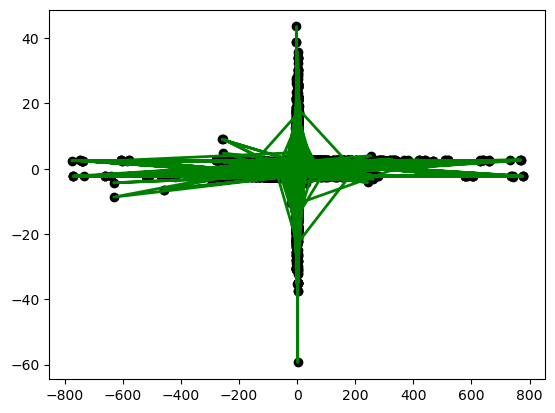

In [155]:
plt.scatter(y_test, y_test_pred,  color='black')
plt.plot(y_test, y_test_pred, color='green', linewidth=2)

## Data6: new attributes

In [161]:
lr = LinearRegression()
lr.fit(X_train_new, y_train_new)
y_train_pred = lr.predict(X_train_new)
y_test_pred = lr.predict(X_test_new)

In [162]:
print('Intercept: %.3f' % lr.intercept_)

Intercept: 0.000


In [163]:
lr.coef_

array([ 2.59300462e+08, -1.72831118e-04,  1.03720186e+08,  1.74369663e-04,
       -5.18600902e+07])

In [164]:
print('Train Accuracy: %.3f' % lr.score(X_train_new, y_train_new))
print('Test Accuracy: %.3f' % lr.score(X_test_new, y_test_new))

Train Accuracy: 0.186
Test Accuracy: 0.186


In [165]:
lr.predict( [[786.106262, 848.382385, 782.896973, 716.524658, 781.549927]])

array([2.44508687e+11])

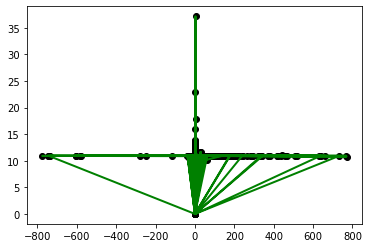

In [166]:
plt.scatter(y_test_new, y_test_pred,  color='black')
plt.plot(y_test_new, y_test_pred, color='green', linewidth=2)

In [169]:
df_test_new['predict'] = y_test_pred

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_20186/1982844353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_new['predict'] = y_test_pred


In [170]:
df_test_new

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory,new0,new1,new2,new3,new4,slope,intercept,predict
3063808,38,6,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000196
3063809,38,6,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000196
3063810,38,6,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000196
3063811,38,6,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000196
3063812,38,6,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3244027,38,6,43,63,59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000196
3244028,38,6,43,63,60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000196
3244029,38,6,43,63,61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000196
3244030,38,6,43,63,62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000196


# Output predicted data

In [ ]:
#df_output = df[df['']]

In [ ]:
#np.savetxt(save_path+"lr_predict1.txt", df[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")

In [ ]:
df_test['predict'] = y_test_pred2
np.savetxt(save_path+"lr_predict2.txt", df_test[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")

In [ ]:
#np.savetxt(save_path+"lr_predict3.txt", df_55[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")

In [ ]:
#np.savetxt(save_path+"lr_predict4.txt", df_on[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")

In [ ]:
#np.savetxt(save_path+"lr_predict_new.txt", df_test_new[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")